### Combine test

In [1]:
from feature_process import *
from data_process import *

In [2]:
dlc_path = r'..\final_data\mix_landmark5/Cap-C330-basal.csv'
vids = ''#r'E:\mice\dataset\video\top_segment\20220428-TV1KO_M\Cap-C330\basal_color.avi'
m1 = miceFeature('basal',dlc_path)
print(m1.dlc_raw.shape)
print(m1.feature.shape)

(9135, 10)
(9135, 7)


In [3]:
# config
sel_dist=[[0,3],[3,6]]
sel_ang=[[1,3,2]]
sel_coord=[]
normalize_range=(0,1)
include_index = False
seg_window = 10

dist = count_dist(m1.dlc_raw, sel_dist)[1:]
ang = count_angle(m1.dlc_raw, sel_ang)[1:]
disp = count_disp(m1.dlc_raw, step=1, threshold=None)

feat = dist
feat = np.hstack([feat, ang])
feat = np.hstack([feat, disp[:,0:1]])

In [7]:
feat.shape

(9149, 4)

In [6]:
cwt_signal(feat, window=10, step=1).shape

(914, 240)

In [3]:
dlc_root = r'..\final_data\mix_landmark7'
dlc7 = DataSet(dlc_root)


basal: 41  ,pain: 15  sng: 14  pH7.4: 12


In [4]:
dlc7.generate_feature()

motions num:  100


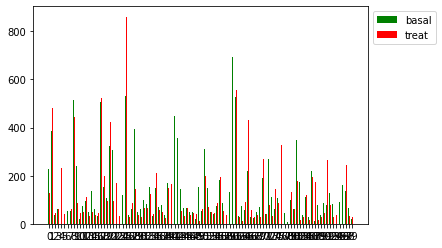

In [5]:
dlc7.pose_cls(sel=['Cap','Capbasal'], sel_num=20, embed=False, k=100, cls_type='km', clf_type='svm')
dlc7.motion_del=True
dlc7.generate_train_test()

In [9]:
np.unique(dlc7.y_test)

array([-1,  0,  1,  2])

### wave test

In [10]:
from scipy import signal
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

In [11]:
t = np.linspace(-1, 1, 10, endpoint=False)

In [12]:
sig  = np.cos(2 * np.pi * 7 * t) + signal.gausspulse(t - 0.4, fc=2)

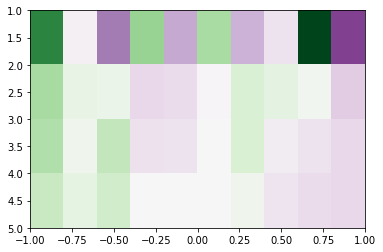

In [70]:
widths = np.arange(1, 5)
cwtmatr = signal.cwt(sig, signal.ricker, widths)
plt.imshow(cwtmatr, extent=[-1, 1, 5, 1], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())

In [71]:
yf = fft(np.array([sig,sig]))
xf = fftfreq(10, 1)

In [72]:
for x in abs(yf):
    print(x)

[0.02680023 0.03709751 0.21742501 1.1719986  6.06084198 2.55082662
 6.06084198 1.1719986  0.21742501 0.03709751]
[0.02680023 0.03709751 0.21742501 1.1719986  6.06084198 2.55082662
 6.06084198 1.1719986  0.21742501 0.03709751]


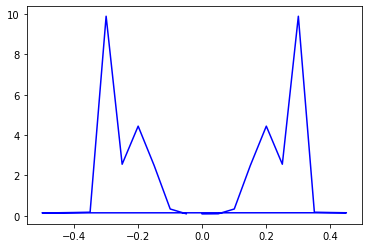

In [43]:
plt.plot(xf, abs(yf), linestyle='-', color='blue')

In [76]:
np.argmax(yf,axis=1)

array([4, 4], dtype=int64)

In [54]:
www.shape

(2, 2)

### Motion test